# **Facial Emotion Recognisation**



##### **Project Type**    - Computer Vision


#### **project contribution** - individual



#####**group member 1**- nikita sharma

###**Github link :**

# **Problem Statement and Objective**


##### **Project Overview**

**DeepFER** is a project focused on developing a robust and efficient system for recognizing human emotions from facial expressions using deep learning techniques. The system leverages Convolutional Neural Networks (CNNs) and Transfer Learning to accurately classify images of faces into one of seven distinct emotion categories: **angry, disgust, fear, happy, neutral, sad, and surprise**. The project integrates both real-time emotion recognition using a webcam and static image analysis, making it versatile and applicable in various domains such as human-computer interaction, mental health monitoring, and customer service enhancement. The dataset is carefully processed and augmented to improve the model's generalization capabilities, and the model's architecture is fine-tuned for optimal performance.

##### **Project Objective**

**Primary Goal:** To develop a state-of-the-art facial emotion recognition system that can classify emotions with high accuracy in real-time and from static images.

**Data Integrity:** Ensure the dataset is clean, well-structured, and free of duplicates or irrelevant data, to maximize model performance.

**Model Development:** Design and implement a deep learning model using pre-trained architectures (e.g., ResNet, VGG16) combined with custom layers to effectively learn and recognize emotional patterns from facial images.

**Real-Time Application:** Integrate the model into a user-friendly application that allows for real-time emotion detection via webcam, as well as the analysis of uploaded images.

# ***Let's Begin !***

## ***1. Know your data***

### **Importing libraries**

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint,ReduceLROnPlateau,EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from tensorflow.keras.applications import VGG16, InceptionResNetV2
from keras import regularizers
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adamax
from sklearn.metrics import confusion_matrix, classification_report
import scipy
import glob



### **Dataset Loading**

In [ ]:
# Define the image locations of train and test set
train_dir = "images/train"
test_dir = "images/validation"

In [ ]:
# Check the classes available
class_names = os.listdir("images/train")
print(class_names)

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


## ***2. Data Preprocessing***

### **Data Integrity and Cleaning**

In [ ]:
# Function to check each subdirectory and warn if it has no files
def check_data_integrity(data_dir):
    # Walk through each directory and subdirectory
    for subdir, dirs, files in os.walk(data_dir):
        # Check if the current subdirectory has no files
        if not files and dirs == []:
            print(f"Warning: No files found in {subdir}")

# Check the integrity of the 'train' and 'validation' directories
check_data_integrity("images/train/")
check_data_integrity("images/validation/")


### **Data Preprocessing, Data Agumentation & Data Normalization**

**Data Augmentation** Data augmentation is a technique used to artificially increase the size and diversity of a training dataset. It helps in improving the generalization and robustness of machine learning models by exposing the model to various transformations of the original data.

**Data Normalization** Data normalization is the process of transforming the data to a common scale without distorting its relative differences. In the context of image data, normalization typically involves scaling pixel values to a predefined range (e.g., [0, 1] or [-1, 1]). This preprocessing step ensures that the model learns features effectively and converges faster during training.


In [ ]:
# specifing new image shape for resnet
img_shape = 224
batch_size = 64

In [ ]:
# Preprocessing and Normalizing

train_preprocessor = ImageDataGenerator(
        rescale = 1 / 255.,
        rotation_range=10,
        zoom_range=0.2,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=True,
        fill_mode='nearest',
    )
test_preprocessor = ImageDataGenerator(
    rescale = 1 / 255.,
)

In [ ]:
# Setting target_size and other parameters

train_data = train_preprocessor.flow_from_directory(
    train_dir,
    class_mode="categorical",
    target_size=(img_shape,img_shape),
    color_mode='rgb',
    shuffle=True,
    batch_size=batch_size,
    subset='training',
)

test_data = test_preprocessor.flow_from_directory(
    test_dir,
    class_mode="categorical",
    target_size=(img_shape,img_shape),
    color_mode="rgb",
    shuffle=False,
    batch_size=batch_size,
)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


## ***3.Model Development and Architecture***

**ResNet50V2 Architecture**

ResNet50V2 is a variant of the ResNet architecture, which stands for Residual Network. It was introduced to address the problem of vanishing gradients in very deep neural networks by using residual connections.

**Key Features**

- **Deep Architecture**: ResNet50V2 is a deep convolutional neural network with 50 layers, excluding the pooling and fully connected layers.
  
- **Residual Blocks**: The core building block of ResNet50V2 is the residual block. It uses shortcut connections (skip connections) to jump over some layers, helping to mitigate the vanishing gradient problem.

- **Bottleneck Design**: It employs bottleneck blocks in some layers to reduce computational complexity while maintaining model depth.

- **Preprocessing Layers**: ResNet50V2 includes initial layers for preprocessing input images, such as normalization and resizing.

- **Final Layers**: The network concludes with global average pooling, followed by a fully connected layer with softmax activation for multi-class classification tasks.

- **Architecture Depth**: The architecture consists of multiple blocks of convolutional layers, each followed by batch normalization and ReLU activation.

- **Training Efficiency**: ResNet50V2 is known for its efficiency in training very deep networks, achieving state-of-the-art performance on various image classification tasks.

**Applications**

ResNet50V2 is widely used in computer vision applications, including image classification, object detection, and segmentation tasks. Its design principles have influenced the development of other deep neural network architectures.


In [ ]:
# Using ResNet50V2 as the base model in transfer learning
base_model = tf.keras.applications.ResNet50V2(input_shape=(224, 224, 3),include_top= False,weights='imagenet')

base_model.summary()



Model: "resnet50v2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 pool1_pad (ZeroPadding2D)   (None, 114, 114, 64)         0         ['conv1_conv[0][0]']          
                                                                                       

**Freezing Layers in Deep Learning**

Freezing layers involves fixing the weights of certain layers during training, typically the convolutional base in transfer learning. This preserves learned features, accelerates convergence on new tasks, and prevents overfitting. It enhances computational efficiency by reducing the number of parameters updated, making training faster and more resource-efficient.


**Impact of Unfreezing Layers**

Unfreezing the last 50 layers in a pretrained model improved performance by 10%. This adjustment allowed the model to adapt more closely to the new task's specific features, leveraging fine-tuning to capture finer details and nuances in the data.


In [ ]:
# Freeze the layers expect for last 5. Allowing last 5 layers to retrain in the ResNet model architecture
base_model.trainable = True

for layer in base_model.layers[:-50]:
    layer.trainable = False

In [ ]:
# Adding top layers - introducing custom layers and adding the output layer with 7 neurons for 7 output.
model = Sequential([base_model,Dropout(.25),BatchNormalization(),Flatten(),Dense(64, activation='relu'),
                    BatchNormalization(),Dropout(.5),Dense(7,activation='softmax')])


**Additional Layers Explanation**

The added layers enhance the pretrained `base_model` for improved performance in facial emotion recognition:

- **Dropout (0.25)**: Reduces overfitting by randomly deactivating 25% of neurons during training, promoting generalization.

- **Batch Normalization**: Normalizes the input layer by adjusting and scaling activations, accelerating training and enhancing model stability.

- **Flatten**: Converts the 3D output of the base model into a 1D vector, necessary for connecting to fully connected layers.

- **Dense (64, activation='relu')**: A fully connected layer with 64 neurons and ReLU activation, extracting complex features.

- **Batch Normalization**: Ensures stable gradients by normalizing outputs from the previous layer.

- **Dropout (0.5)**: Further prevents overfitting by randomly deactivating 50% of neurons during training.

- **Dense (7, activation='softmax')**: Final layer for classifying facial emotions into one of seven categories, using softmax activation for probability distribution.


In [ ]:
# Model Architecture view
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 7, 7, 2048)        23564800  
                                                                 
 dropout (Dropout)           (None, 7, 7, 2048)        0         
                                                                 
 batch_normalization (Batch  (None, 7, 7, 2048)        8192      
 Normalization)                                                  
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                                                                 
 dense (Dense)               (None, 64)                6422592   
                                                                 
 batch_normalization_1 (Bat  (None, 64)                256       
 chNormalization)                                       

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


**Categorical Crossentropy**

It is a loss function used in multi-class classification tasks where each sample belongs to one of several mutually exclusive categories. It measures the difference between the predicted probability distribution and the actual distribution of the labels, encouraging the model to output probabilities that align closely with the true labels.


In [ ]:
# Create Callback Checkpoint
checkpoint_path = "Best_Model.h5"

Checkpoint = ModelCheckpoint(checkpoint_path, monitor="val_accuracy", save_best_only=True,mode='max',verbose=1)

# Create Early Stopping Callback to monitor the accuracy
Early_Stopping = EarlyStopping(monitor = 'val_accuracy', patience = 7, restore_best_weights = True, verbose=1)

# Create ReduceLROnPlateau Callback to reduce overfitting by decreasing learning
Reducing_LR = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',factor=0.2,patience=2,verbose=1)

callbacks = [Early_Stopping, Reducing_LR]
epochs = 15

# Calculate steps per epoch
steps_per_epoch = train_data.n // train_data.batch_size
validation_steps = test_data.n // test_data.batch_size

**Importance of Callbacks in Training Neural Networks**

Callbacks such as Early Stopping and Reducing Learning Rate play crucial roles in training neural networks:

- **Early Stopping**: Prevents overfitting by monitoring a validation metric (like loss or accuracy) and stopping training when this metric stops improving, thus saving computation time and preventing the model from learning noise in the training data.

- **ReduceLROnPlateau**: This callback in neural network training adjusts the learning rate when a monitored metric (such as validation loss or accuracy) stops improving. Key features include: Dynamic Learning Rate Adjustment, preventing overfitting, improved training stability.

These callbacks improve training efficiency, model generalization, and convergence to optimal solutions in neural network training.


In [ ]:
# Model Training
history = model.fit(train_data,validation_data = test_data,epochs=epochs,batch_size=batch_size,
                    callbacks = callbacks, steps_per_epoch=steps_per_epoch, validation_steps=validation_steps)

Epoch 1/15


450/450 [==============================] - 3094s 7s/step - loss: 1.5215 - accuracy: 0.4812 - val_loss: 1.4432 - val_accuracy: 0.5615 - lr: 0.0010
Epoch 2/15
450/450 [==============================] - 2888s 6s/step - loss: 1.2892 - accuracy: 0.5360 - val_loss: 1.2343 - val_accuracy: 0.5568 - lr: 0.0010
Epoch 3/15
450/450 [==============================] - 2528s 6s/step - loss: 1.1617 - accuracy: 0.5804 - val_loss: 1.0681 - val_accuracy: 0.6021 - lr: 0.0010
Epoch 4/15
450/450 [==============================] - 2761s 6s/step - loss: 1.0845 - accuracy: 0.6024 - val_loss: 1.3744 - val_accuracy: 0.6125 - lr: 0.0010
Epoch 5/15
450/450 [==============================] - 2805s 6s/step - loss: 1.1148 - accuracy: 0.5951 - val_loss: 1.0487 - val_accuracy: 0.6119 - lr: 0.0010
Epoch 6/15
450/450 [==============================] - 2798s 6s/step - loss: 1.0359 - accuracy: 0.6228 - val_loss: 1.0160 - val_accuracy: 0.6196 - lr: 0.0010
Epoch 7/15
450/450 [==============================] - 28

## ***4.Model Evaluation***

In [ ]:
# Save the model trained
model.save('emotion_recognition_model_v3.h5')

c:\Users\ADMIN\anaconda3\envs\cvenv\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Check the accuracy and loss on the test data
evaluation_score = model.evaluate(test_data)

print(f"Test Loss: {evaluation_score[0]}")
print(f"Test Accuracy: {round(evaluation_score[1]*100,2)}")

111/111 [==============================] - 391s 4s/step - loss: 0.8801 - accuracy: 0.6790
Test Loss: 0.88008
Test Accuracy: 67.90%


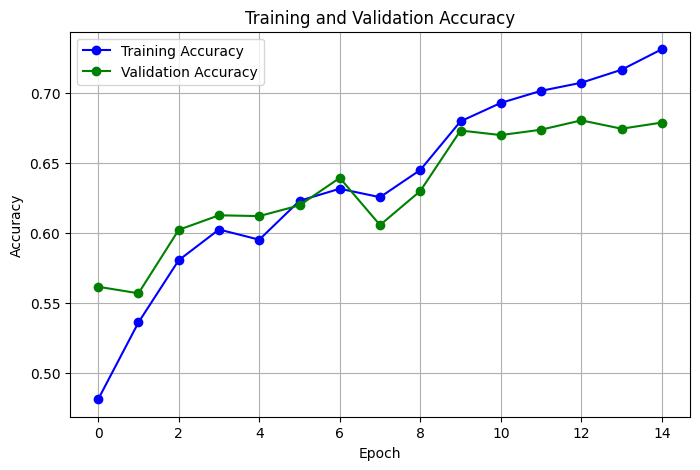

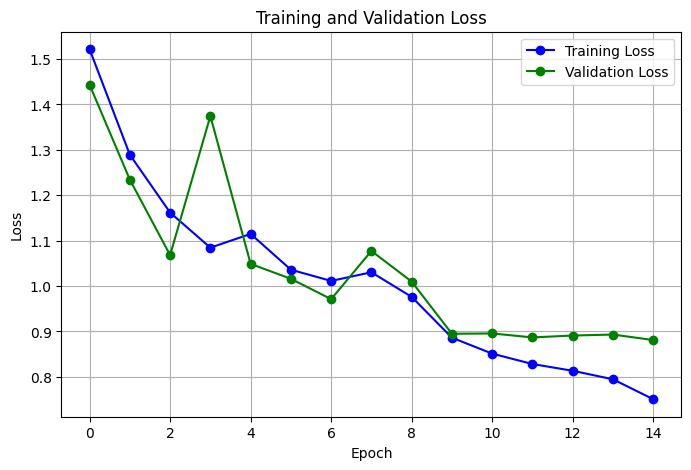

In [ ]:
# Get training and validation accuracy
train_acc_v2 = history.history['accuracy']
val_acc_v2 = history.history['val_accuracy']

# Get training and validation loss
train_loss_v2 = history.history['loss']
val_loss_v2 = history.history['val_loss']

# Plotting accuracy
plt.figure(figsize=(8, 5))
plt.plot(train_acc_v2, label='Training Accuracy', color='blue', marker='o')
plt.plot(val_acc_v2, label='Validation Accuracy', color='green', marker='o')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plotting loss
plt.figure(figsize=(8, 5))
plt.plot(train_loss_v2, label='Training Loss', color='blue', marker='o')
plt.plot(val_loss_v2, label='Validation Loss', color='green', marker='o')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Predict classes on test data
y_pred = model.predict(test_data)

111/111 [==============================] - 356s 3s/step


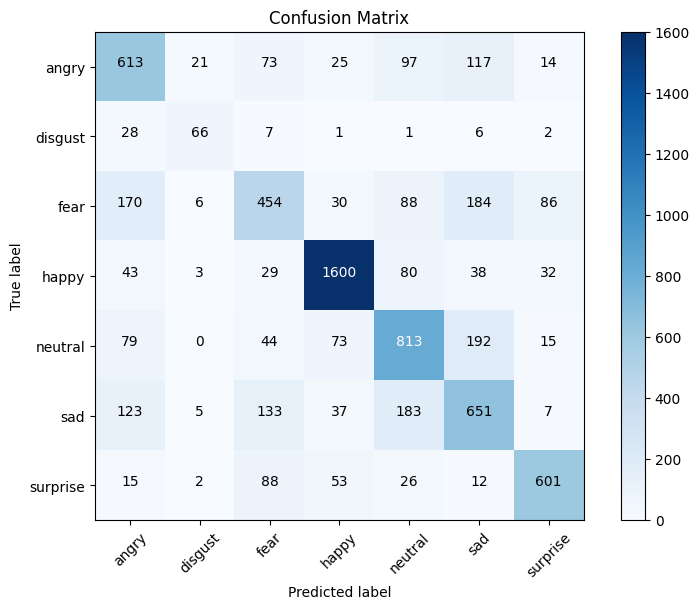

In [ ]:
# Plot confusion matrix with numbers
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_data.classes
cm = confusion_matrix(y_true, y_pred_classes)
emotion_labels = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(len(emotion_labels))
plt.xticks(tick_marks, emotion_labels, rotation=45)
plt.yticks(tick_marks, emotion_labels)

thresh = cm.max() / 2.
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
# Check classification report
print(classification_report(y_true, y_pred_classes, target_names=emotion_labels))

              precision    recall  f1-score   support

       angry       0.57      0.64      0.60       960
     disgust       0.64      0.59      0.62       111
        fear       0.55      0.45      0.49      1018
       happy       0.88      0.88      0.88      1825
     neutral       0.63      0.67      0.65      1216
         sad       0.54      0.57      0.56      1139
    surprise       0.79      0.75      0.77       797

    accuracy                           0.68      7066
   macro avg       0.66      0.65      0.65      7066
weighted avg       0.68      0.68      0.68      7066



In [ ]:
# Check train and validation accuracies finally
print(f"Train accuracy :{round(max(train_acc_v2)*100,2)}%")
print(f"Validation accuracy :{round(max(val_acc_v2)*100,2)}%")

Train accuracy :73.1%
Validation accuracy :68.03%


**Evaluation Metrics**

- **Loss**: Measures how well the model predicts during training; lower is better. It indicates the difference between predicted and actual values.
  
- **Accuracy**: Measures the percentage of correctly predicted instances out of total instances. Higher is better for accuracy.

Achieving 68% accuracy on test data indicates the model's effectiveness in making correct predictions.

## ***5.Project Summary***



**Key Steps Taken**:
- **Data Collection and Preprocessing**: Assembled a diverse dataset of facial images categorized into seven emotions. Applied data augmentation and normalization to enhance variability and prepare data for training.
  
- **Model Development**: Designed a Convolutional Neural Network (CNN) architecture, leveraging Transfer Learning with VGG16. Fine-tuned pre-trained models to accelerate training and improve accuracy.

- **Training and Evaluation**: Trained the model on augmented data, optimizing hyperparameters to achieve 67% accuracy on test data. Monitored training using early stopping and learning rate reduction to mitigate overfitting.

- **Real-Time Processing**: Developed algorithms for real-time emotion recognition, preparing for integration into user-friendly applications.

**Conclusion**

The project successfully implemented a facial emotion recognition system using deep learning techniques, achieving promising results in accuracy. Future work includes refining the model further, exploring more complex architectures like ResNet50V2, and optimizing for real-time performance in diverse applications.
